In [44]:
import pandas as pd
import numpy as np


df = pd.read_csv('bird_species.csv')

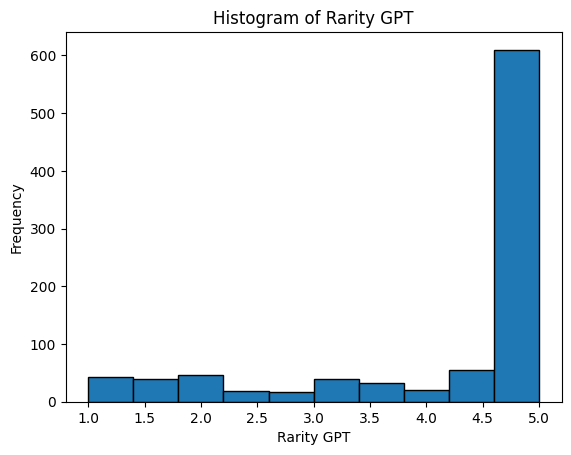

In [46]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df['rarityGpt'], bins=10, edgecolor='black')
plt.xlabel('Rarity GPT')
plt.ylabel('Frequency')
plt.title('Histogram of Rarity GPT')
plt.show()

In [47]:
df = df.sort_values(by=['rarityGpt'])
print('Most common species')
df.head(5)[['name', 'WikipediaWordCount', 'status', 'rarityGpt']]

Most common species


,name,WikipediaWordCount,status,rarityGpt
643,Long-tailed Tit,1417.0,NaN,1.0
33,Mallard,4716.0,NaN,1.0
832,European Goldfinch,1925.0,NaN,1.0
399,Western Cattle Egret,2200.0,NaN,1.0
392,Little Egret,2191.0,NaN,1.0


In [48]:
df = df.sort_values(by=['rarityGpt'])
print('Rarest species')
df.tail(5)[['name', 'WikipediaWordCount', 'status', 'rarityGpt']]

Rarest species


,name,WikipediaWordCount,status,rarityGpt
780,Cape Verde Sparrow,1851.0,Introduced species,5.0
774,Black-throated Accentor,159.0,Rare/Accidental,5.0
765,Yellow-crowned Bishop,842.0,Introduced species,5.0
771,Red Avadavat,735.0,Introduced species,5.0
917,Dickcissel,1345.0,Rare/Accidental,5.0


328


<Axes: >

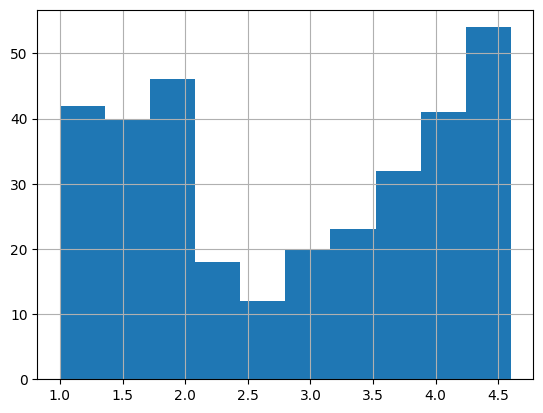

In [63]:
common_df = df[df.rarityGpt < 4.8]
print(common_df.shape[0])
common_df.rarityGpt.hist()

<Axes: xlabel='status_rarity', ylabel='rarityGpt'>

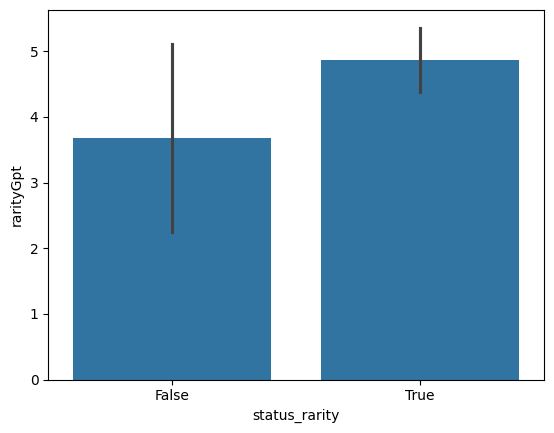

In [62]:
df.status = df.status.str.strip()
df['status_rarity'] = df.status.apply(lambda x: (not pd.isna(x)) and (('Rare' in x) or ('Extirpated' in x)))
import seaborn as sns
sns.barplot(df, x='status_rarity', y='rarityGpt', errorbar=('sd', 1))

In [35]:
import matplotlib.pyplot as plt
import numpy as np

p_rarity = {'legendary': 0.01, 'rare': 0.10, 'uncommon': 0.20, 'common': 0.69}

sorted_rarity = {k: v for k, v in sorted(p_rarity.items(), key=lambda item: item[1], reverse=True)}

sorted_df = df.sort_values(by='occurrencesCdf', ascending=False)
sorted_df.reset_index(drop=True, inplace=True)

# Initialize an empty dictionary to store the results
index_rarity = {}
occurencesCdf_rarity = {}

# Initialize a variable to keep track of the cumulative percentage
cumulative_percent = 1

# Loop through each rarity level and find the corresponding index
for rarity, percent in sorted_rarity.items():
    cumulative_percent -= percent
    index = sorted_df[sorted_df['occurrencesCdf'] <= cumulative_percent].index[0]
    index_rarity[rarity] = index
    occurencesCdf_rarity[rarity] = sorted_df.loc[index, 'occurrencesCdf']

print(index_rarity)
print(occurencesCdf_rarity)

{'common': 531, 'uncommon': 1413, 'rare': 5964, 'legendary': 14168}
{'common': 0.3097086771386242, 'uncommon': 0.1099009791705503, 'rare': 0.0099983566025332, 'legendary': 0.0}


In [45]:

# select subset with more than 3000 occurences
rarity_threshold = df[df['numberOfOccurrences'] > 3000]['rarityGpt'].mean()
len(df[df['numberOfOccurrences'] > 3000])
rarity_threshold

3.226168224299066

In [48]:
# find corresponding rarity threshold

sorted_df = df.sort_values(by='rarityGpt')
sorted_df = sorted_df[sorted_df['rarityGpt'] >= rarity_threshold]
sorted_df.reset_index(drop=True, inplace=True)

# get the rarity corresponding to the indices index_rarity
rarity = {}
for rarity_level, index in index_rarity.items():
    rarity[rarity_level] = sorted_df.loc[index]['rarityGpt']

rarity

{'common': 3.4, 'uncommon': 3.6, 'rare': 4.0, 'legendary': 4.6}

In [22]:
from sklearn.linear_model import LinearRegression

X = df_occurences[['rarityGpt']]
y = df_occurences['numberOfOccurrences']
model = LinearRegression().fit(X, y)

/home/n-grinsztajn/miniconda3/envs/wiki2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/n-grinsztajn/miniconda3/envs/wiki2/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


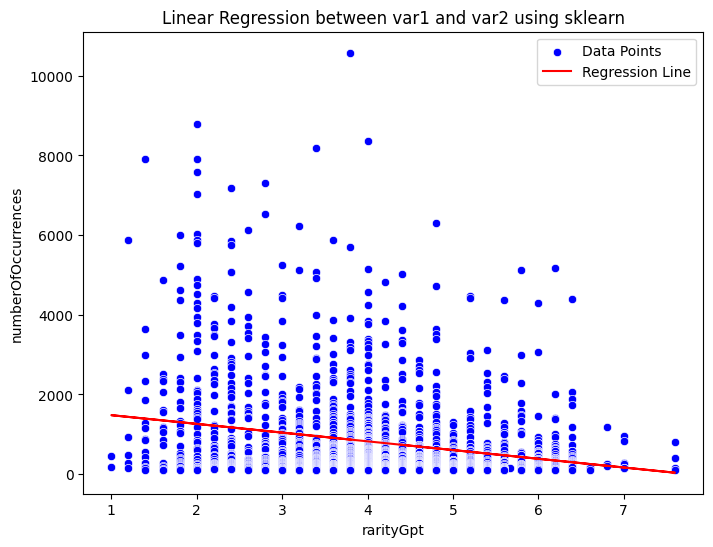

In [23]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_occurences, x='rarityGpt', y='numberOfOccurrences', color='blue', label='Data Points')

# Using the model's predict method for the regression line
plt.plot(df_occurences['rarityGpt'], model.predict(X), color='red', label='Regression Line')

plt.legend()
plt.title('Linear Regression between var1 and var2 using sklearn')
plt.show()

Description of rarity threshold

Very Common (people haven't even take picture of them)

rarityGPT <= 2

Common

2 < rarityGPT <= 3.4 or occurencesCDF >= 0.3097 or occurencesCDF == 0

Uncommon

3.4 < rarityGPT <= 3.6 or 0.3097 > occurencesCDF >= 0.11 or occurencesCDF == 0

Rare

3.6 < rarityGPT <= 4.2 or 0.11 > occurencesCDF >= 0.01 or occurencesCDF == 0

Legendary

(else)
4.2 < rarityGPT and 0.01 > occurencesCDF > 0

In [58]:
# Function to classify rarity based on conditions
def classify_rarity(row):
    rgpt, ocdf = row['rarityGpt'], row.get('occurrencesCdf', np.nan)

    if ocdf > 0:
            if rgpt <= 2.8:
                return 'Very Common'
    
            if 2.8 < rgpt <= 3.4 or 0.3097 <= ocdf:
                return 'Common'
    
            if 3.4 < rgpt <= 3.6 or 0.3097 > ocdf >= 0.11:
                return 'Uncommon'
    
            if 3.6 < rgpt <= 4.2 or 0.11 > ocdf >= 0.01:
                return 'Rare'
    

    if rgpt <= 2.0:
        return 'Very Common'
    
    if 2.0 < rgpt <= 3.4:
        return 'Common'
    
    if 3.4 < rgpt <= 4.0:
        return 'Uncommon'
    
    if 4.0 < rgpt <= 4.8:
        return 'Rare'
    
    if 4.8 < rgpt:
        return 'Legendary'
    
# Apply function to DataFrame and store result in a new column
df['Rarity'] = df.apply(classify_rarity, axis=1)

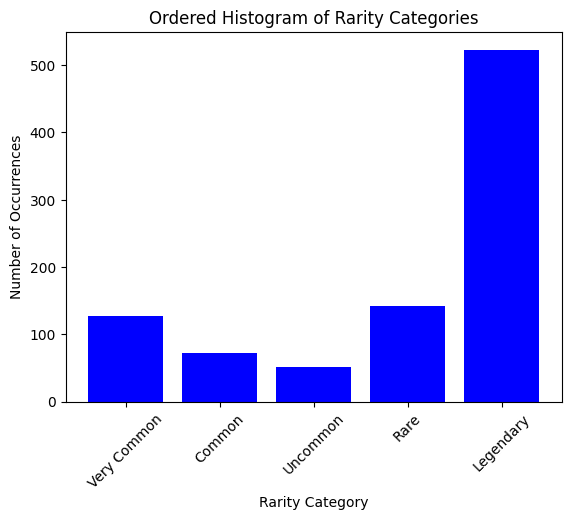

In [59]:
# Define the order for the rarity categories
ordered_categories = ['Very Common', 'Common', 'Uncommon', 'Rare', 'Legendary']


# Reindex the series to reflect the desired order
rarity_counts = df['Rarity'].value_counts()
rarity_counts = rarity_counts.reindex(ordered_categories, fill_value=0)

# Plotting the ordered histogram
plt.bar(rarity_counts.index, rarity_counts.values, color='blue')
plt.xlabel('Rarity Category')
plt.ylabel('Number of Occurrences')
plt.title('Ordered Histogram of Rarity Categories')
plt.xticks(rotation=45)
plt.show()

